# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [279]:
# If on colab, uncomment the following lines

#! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [280]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

Methods `describe` and `info` deliver some useful information.

In [281]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,72,92,39,91,191,62,8,176,37,21,137,196,466,151,67,3,23,192,200
1,331,104,52,96,188,59,9,188,35,22,161,206,530,205,67,11,8,193,200
2,582,108,53,104,181,56,11,220,31,25,167,226,712,214,72,15,18,189,199
3,611,90,49,85,141,57,11,159,43,20,167,173,365,186,75,1,11,182,192
4,562,113,53,93,197,62,11,216,31,24,165,221,688,196,72,6,25,188,199
5,732,85,45,73,167,69,8,143,46,18,148,173,307,176,71,2,0,190,199
6,344,99,55,101,219,68,10,224,30,25,178,228,737,213,74,11,20,187,196
7,188,101,51,105,212,68,10,209,32,24,162,222,653,224,73,5,23,186,195
8,646,90,38,79,185,69,6,160,40,20,130,178,393,133,66,2,14,198,205
9,356,91,45,76,171,69,7,150,44,19,144,170,340,179,69,12,1,195,201


In [282]:
#y_train.shape
X_train_pd[1]

0       92
1      104
2      108
3       90
4      113
      ... 
544     98
545     88
546     98
547     89
548     93
Name: 1, Length: 549, dtype: int64

In [283]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,430.103825,93.196721,44.484517,81.156648,168.000000,61.870674,8.657559,166.774135,41.336976,20.417122,147.278689,186.714026,428.546448,172.559199,72.533698,6.358834,12.535519,188.939891,195.712204
std,245.516055,8.060306,6.136988,15.541945,34.509969,8.432625,5.118597,31.911774,7.657430,2.484800,14.529630,30.201274,167.938554,31.866262,7.762514,4.948698,8.753368,6.205280,7.292698
min,1.000000,73.000000,33.000000,40.000000,104.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,218.000000,87.000000,39.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,146.000000,68.000000,2.000000,5.000000,184.000000,191.000000
50%,435.000000,92.000000,44.000000,78.000000,164.000000,61.000000,8.000000,155.000000,43.000000,19.000000,145.000000,176.000000,358.000000,172.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,640.000000,98.000000,49.000000,94.000000,194.000000,65.000000,10.000000,193.000000,46.000000,22.000000,158.000000,214.000000,567.000000,193.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,262.000000,61.000000,28.000000,186.000000,320.000000,987.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [284]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [285]:
### YOUR CODE HERE
#X_train_s = X_train_pd[0:297]
#X_train_pd[:,1]


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

/home/jctuesta/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


IndexError: ignored

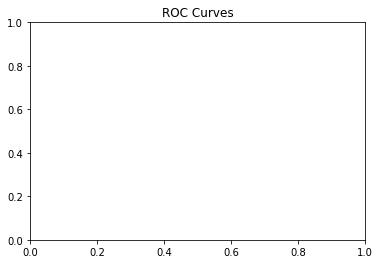

In [296]:
### YOUR CODE HERE
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

model = LogisticRegression(solver='saga',multi_class='multinomial',max_iter=500,tol=1e-3)
model.fit(X_train, y_train)
lr_probs = model.predict_proba(X_train)[::,1]
y_pred = model.predict(X_test)

a = classification_report(y_test,y_pred)
a


y_pred_proba = model.predict_proba(X_test)[::,1]
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)
skplt.metrics.plot_roc(X_test, lr_probs)
plt.show()

In [291]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.6835016835016835


In [293]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: ignored

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
### YOUR CODE HERE
  
 pca = decomposition.PCA()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE